In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [20]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
df['species'],categroies = pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [27]:
df.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


Hence its time to visualize the data

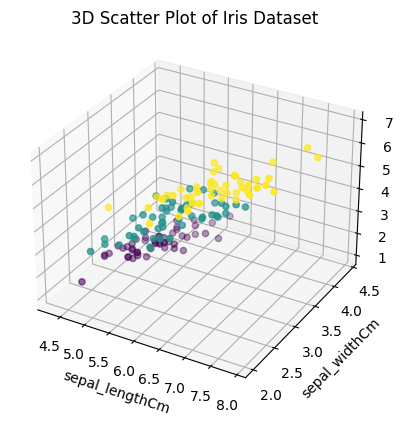

In [28]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['sepal_length'], df['sepal_width'], df['petal_length'], c=df['species'])
ax.set_xlabel('sepal_lengthCm')
ax.set_ylabel('sepal_widthCm')
ax.set_zlabel('Species')
plt.title('3D Scatter Plot of Iris Dataset')
plt.show()

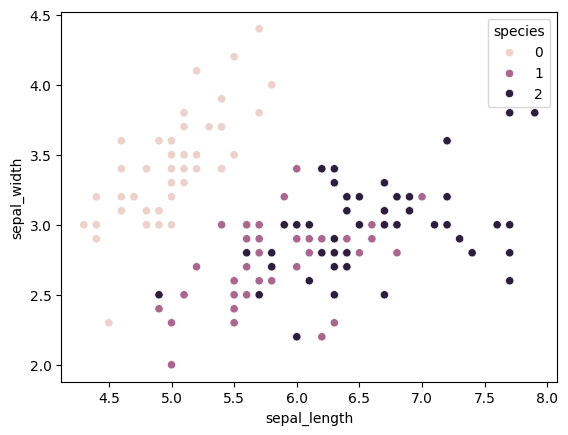

In [30]:
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species');

Applying Elbow Technique

In [33]:
!pip install scikit-learn
from sklearn.cluster import KMeans # Import the KMeans class

k_rng = range(1,10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k) # Use KMeans (capital K)
    km.fit(df[['sepal_length', 'sepal_width']])
    sse.append(km.inertia_)

In [34]:
sse

[130.4752666666667,
 58.204092789066756,
 37.0507021276596,
 28.011149160808465,
 21.171898215808067,
 17.36509523809524,
 14.831523892773895,
 13.095846861471863,
 11.116336655011656]

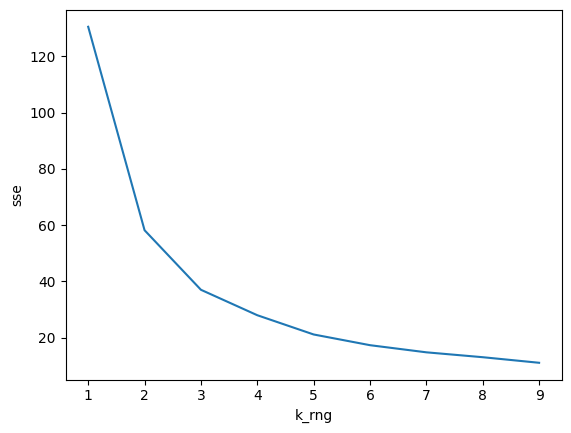

In [35]:
plt.xlabel('k_rng')
plt.ylabel('sse')
plt.plot(k_rng,sse)

Applying KMean Algorithm

In [36]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['sepal_length', 'sepal_width']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [39]:
df['cluster']=y_predicted
df.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


Accuracy measure

In [41]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(df.species,df.cluster)
cm


array([[50,  0,  0],
       [ 0, 12, 38],
       [ 0, 35, 15]])

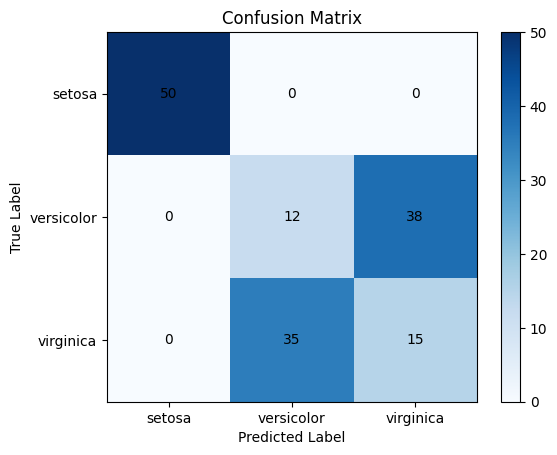

In [43]:
true_labels = df.species
predicted_labels=df.cluster
cm=confusion_matrix(true_labels,predicted_labels)
class_labels = ['setosa', 'versicolor', 'virginica']

#plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

#fill matrix with values
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i][j]), horizontalalignment='center', verticalalignment='center')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()